In [9]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [10]:

def ramsey_growth_equations(y, t, alpha, beta, delta, rho, sigma):
    k, c = y
    dkdt = alpha * k**rho - delta * k - c
    dcdt = c * (beta * alpha * rho * k**(rho-1) - delta - rho * alpha * k**(rho-1) - sigma)
    return [dkdt, dcdt]

def find_steady_state(alpha, beta, delta, rho, sigma):
    def steady_state_equations(y):
        return ramsey_growth_equations(y, 0, alpha, beta, delta, rho, sigma)
    initial_guess = [1.0, 1.0]
    steady_state_values = fsolve(steady_state_equations, initial_guess)
    k_ss, c_ss = steady_state_values
    growth_rate_ss = alpha * k_ss**(rho-1) - delta
    return steady_state_values, growth_rate_ss

alpha = 0.172
beta = 0.15
delta = 0.14
rho = 1.0
sigma = 1.0

steady_state_values, growth_rate_ss = find_steady_state(alpha, beta, delta, rho, sigma)

print(f"Steady State Values: k = {steady_state_values[0]}, c = {steady_state_values[1]}")
print(f"Steady State Growth Rate (Sustainable Growth Rate): {growth_rate_ss}")

Steady State Values: k = 3e-323, c = 0.0
Steady State Growth Rate (Sustainable Growth Rate): 0.03199999999999997


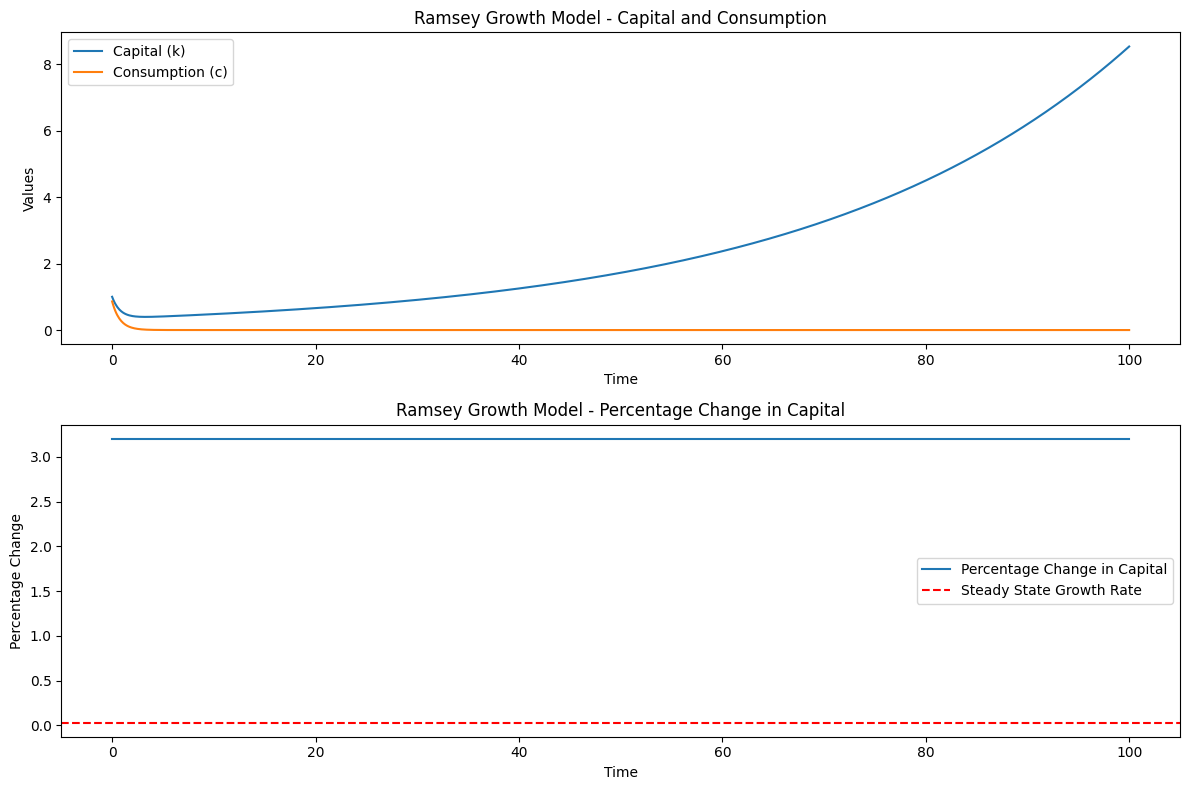

In [11]:
k0 = 1.0
c0 = k0**rho - delta * k0

t_span = (0, 100)

solution = solve_ivp(
    fun=lambda t, y: ramsey_growth_equations(y, t, alpha, beta, delta, rho, sigma),
    t_span=t_span,
    y0=[k0, c0],
    method='RK45',
    dense_output=True
)

t_values = np.linspace(t_span[0], t_span[1], 1000)
y_values = solution.sol(t_values)

growth_rate = alpha * y_values[0]**(rho-1) - delta
percentage_change = 100 * growth_rate

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t_values, y_values[0], label='Capital (k)')
plt.plot(t_values, y_values[1], label='Consumption (c)')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.title('Ramsey Growth Model - Capital and Consumption')

plt.subplot(2, 1, 2)
plt.plot(t_values, percentage_change, label='Percentage Change in Capital')
plt.axhline(y=growth_rate_ss, color='r', linestyle='--', label='Steady State Growth Rate')
plt.xlabel('Time')
plt.ylabel('Percentage Change')
plt.legend()
plt.title('Ramsey Growth Model - Percentage Change in Capital')

plt.tight_layout()
plt.show()
